# Model Evaluation

## 1) Importing Required Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mb
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

## 2) Loading our trained model and preprocessed dataset

In [2]:
dataset = pd.read_csv(r"preprocessed_data.csv")
dataset.head(2)

,movie_id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End


In [3]:
cosine_sim = np.load("trained model.npy")

## 3) Spliting the dataset into test-train data for evaluation

In [4]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [5]:
train.shape, test.shape

((3844, 2), (962, 2))

In [6]:
# Function for movie recommendation
def get_recommendations(title, cosine_sim):
    idx = dataset[dataset['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get the top 10 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return dataset['title'].iloc[movie_indices]
get_recommendations('Avatar',cosine_sim)

1214    Aliens vs Predator: Requiem
2405                         Aliens
507                Independence Day
3728                  Falcon Rising
539                      Titan A.E.
Name: title, dtype: object

In [7]:
# Function to evaluate the recommendations
def evaluate_recommendations(test, cosine_sim):
    y_true = []
    y_pred = []

    for idx, row in test.iterrows():
        title = row['title']
        actual_movies = test['title'].tolist()
        recommended_movies = get_recommendations(title, cosine_sim)
        
        # Create binary relevance labels
        for movie in actual_movies:
            y_true.append(1 if movie == title else 0)
            y_pred.append(1 if movie in recommended_movies.values else 0)
    
    return y_true, y_pred

In [8]:
# Evaluate the model
y_true, y_pred = evaluate_recommendations(test, cosine_sim)

# Generate classification report and confusion matrix
report = classification_report(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    924480
           1       0.01      0.01      0.01       964

    accuracy                           1.00    925444
   macro avg       0.50      0.50      0.50    925444
weighted avg       1.00      1.00      1.00    925444



In [9]:
print(cm)

[[923608    872]
 [   959      5]]


## 4) Ploting the confusion_matrix

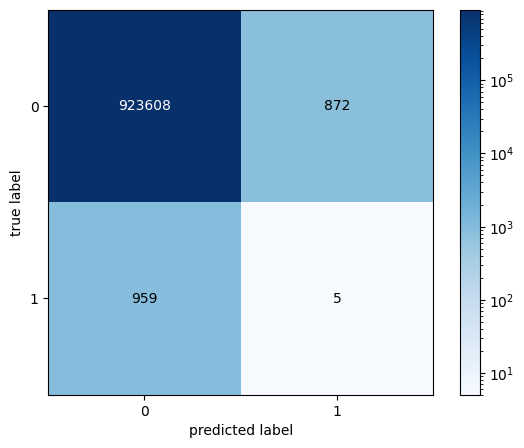

In [10]:
fig, ax = plot_confusion_matrix(conf_mat=cm,norm_colormap=mb.colors.LogNorm(), colorbar= True, figsize=(7,5))  

In [11]:
# Saving our Model

In [12]:
import pickle
dataset.to_pickle("movies_info.pkl")
# Open a file and use dump()
with open('sim_score.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(cosine_sim, file) 